In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
proc_df = pd.read_csv('../dist6_data/proc_corr_dist6.csv', index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1, 2, 3, 8, 9, 21]])
proc_df.index = pd.to_datetime(proc_corr_df.index, unit='s')
proc_df.head()

,xmeas01,xmeas02,xmeas03,xmeas08,xmeas09,xmeas21
tout,,,,,,
2018-03-13 10:03:52.141230,0.271033,3649.739415,4451.320791,64.995825,122.898796,102.480028
2018-03-13 10:04:28.141230,0.000965,3623.428806,4462.360219,64.782059,122.910451,102.463577
2018-03-13 10:05:04.141230,-0.000553,3649.856033,4459.992328,65.640652,122.875696,102.496571
2018-03-13 10:05:40.141230,0.001179,3640.289227,4468.936940,64.547201,122.868379,102.545781
2018-03-13 10:06:16.141230,-0.000089,3654.615228,4444.053549,65.162617,122.863084,102.552682


In [35]:
threshold_df = pd.read_csv('../dist6_data/corr_threshold_MultiLoop_mode1_73_dist6.csv', index_col='proc_var', skiprows=[x for x in range(1,74) if x not in [1,2,3,8,9,21]])
threshold_df.head(6)

,limit,type,dead_band,delay_time
proc_var,,,,
1,0.265139,LOW,NaN,NaN
2,3660.867678,HIGH,NaN,NaN
3,4435.886649,LOW,NaN,NaN
8,64.998690,HIGH,NaN,NaN
9,122.889476,LOW,NaN,NaN
21,102.210643,LOW,NaN,NaN


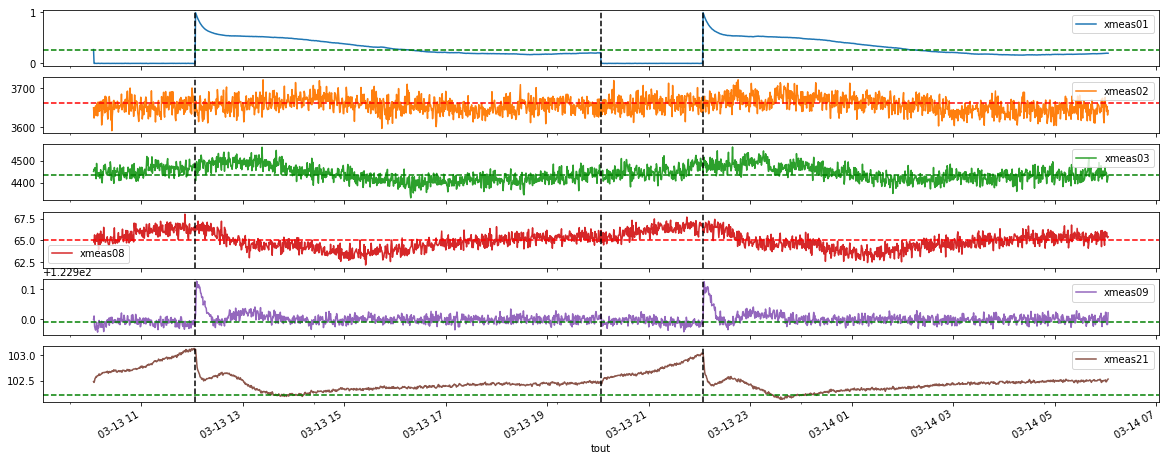

In [56]:
axes = proc_df.iloc[0:2000].plot(subplots=True, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.axhline(y=threshold_df.iloc[i].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
    ax.axvline(x=proc_df.index[200], color="black", ls='--')
    ax.axvline(x=proc_df.index[1000], color="black", ls='--')
    ax.axvline(x=proc_df.index[1200], color="black", ls='--')
plt.show()